In [60]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
url = "https://raw.githubusercontent.com/H-B-P/d-and-d-sci-june/main/dset.csv"
df = pd.read_csv(url)
df = df[:-1]
df.columns = ['Enemy','Strength','Day','Pilot','a','b','g','d','e','z','h']

A solution to the June 2021 edition of D&D.Sci  
(https://www.lesswrong.com/posts/NZvFostjy8gu5mEnc/d-and-d-sci-fi-june-2021-the-duel-with-earwax)

In [57]:
print(df)

          Enemy    Strength  Day       Pilot           a           b  \
0          Jake  1.14 kCept    2  Janelle K.  1.72 kCept  2.76 kCept   
1        Serena   1.7 kCept    3    Maria N.  3.73 kCept  3.12 kCept   
2      Madeline  1.28 kCept    4  Janelle K.  1.76 kCept  2.96 kCept   
3       Herbert   3.1 kCept    5    Maria N.     Unknown     Unknown   
4        Fatima   2.3 kCept    7  Janelle K.     Unknown   2.7 kCept   
..          ...         ...  ...         ...         ...         ...   
276     Spackle   2.2 kCept  801  Janelle K.     Unknown   2.4 kCept   
277  Tourniquet   2.9 kCept  803    Maria N.     Unknown     Unknown   
278      Pastry  0.71 kCept  804  Janelle K.  2.02 kCept  2.86 kCept   
279    Painting   5.5 kCept  813    Maria N.     Unknown     Unknown   
280       Toast   3.1 kCept  814    Maria N.     Unknown     Unknown   

              g           d           e           z           h  
0    1.89 kCept   1.1 kCept  0.14 kCept   0.0 kCept  0.42 kCept  
1  

In [61]:
df = df.replace('Unknown',np.nan)
df['a'] = df['a'].str.rstrip(" kCept").astype(float)
df['b'] = df['b'].str.rstrip(" kCept").astype(float)
df['g'] = df['g'].str.rstrip(" kCept").astype(float)
df['d'] = df['d'].str.rstrip(" kCept").astype(float)
df['e'] = df['e'].str.rstrip(" kCept").astype(float)
df['z'] = df['z'].str.rstrip(" kCept").astype(float)
df['h'] = df['h'].str.rstrip(" kCept").astype(float)
df['Strength'] = df['Strength'].str.rstrip(" kCept").astype(float)

In [62]:
df['Pilot'].value_counts()

Maria N.      164
Janelle K.     96
Will C.         6
Amir B.         6
Flint S.        6
Corazon V.      3
Name: Pilot, dtype: int64

In [63]:
mdf = df[df.Pilot == 'Maria N.']
jdf = df[df.Pilot == 'Janelle K.']

<AxesSubplot:xlabel='Day', ylabel='a'>

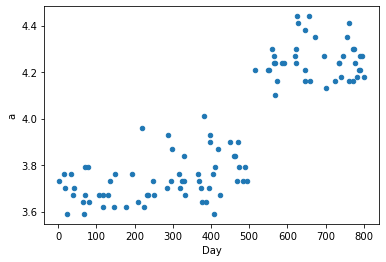

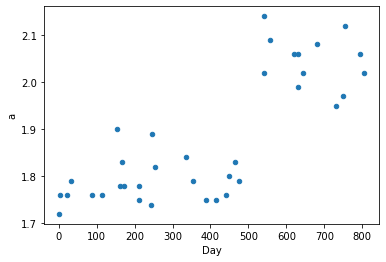

In [64]:
mdf.plot.scatter(x='Day',y='a')
jdf.plot.scatter(x='Day',y='a')

Alpha resonance is either low (far too small), or high (about 3.6 or higher; improved after day ~500 so will work if we get 'high mode')

<AxesSubplot:xlabel='Day', ylabel='b'>

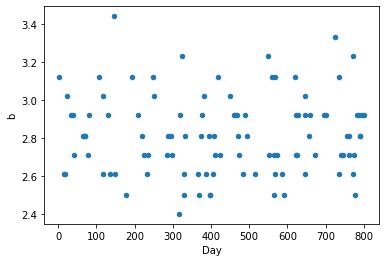

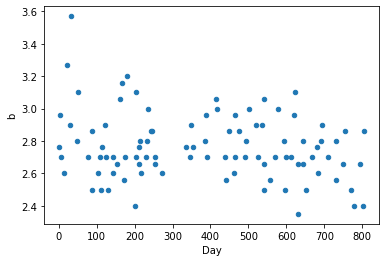

In [65]:
mdf.plot.scatter(x='Day',y='b')
jdf.plot.scatter(x='Day',y='b')

Beta resonance is never high enough.

<AxesSubplot:xlabel='Day', ylabel='g'>

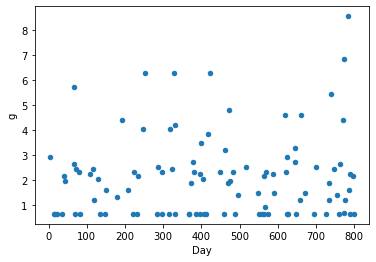

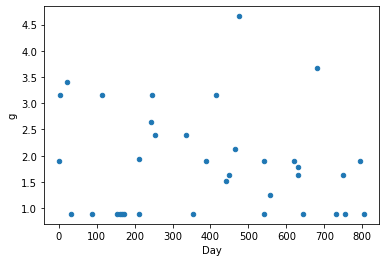

In [66]:
mdf.plot.scatter(x='Day',y='g')
jdf.plot.scatter(x='Day',y='g')

Far more variable; often very low, but can be higher. Would need to find a pattern to use effectively.

<AxesSubplot:xlabel='Day', ylabel='d'>

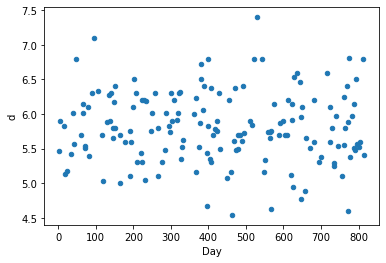

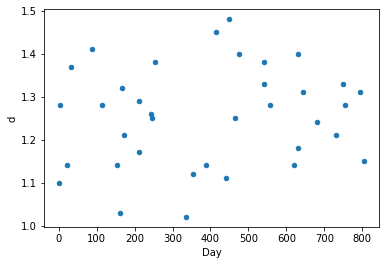

In [67]:
mdf.plot.scatter(x='Day',y='d')
jdf.plot.scatter(x='Day',y='d')

Maria is good at using Delta, and always gets a high result. Janelle is worse - would need to evaluate how good my 4 options are with delta.

<AxesSubplot:xlabel='Day', ylabel='e'>

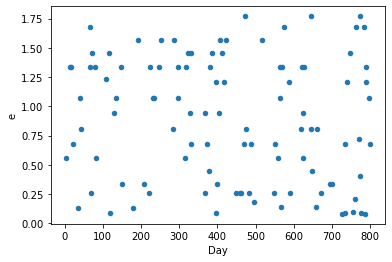

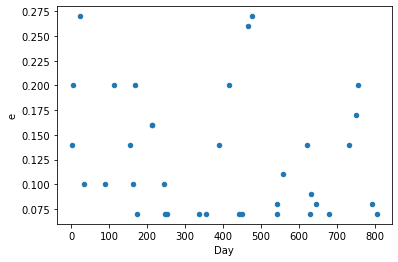

In [68]:
mdf.plot.scatter(x='Day',y='e')
jdf.plot.scatter(x='Day',y='e')

Epsilon looks poor.

<AxesSubplot:xlabel='Day', ylabel='z'>

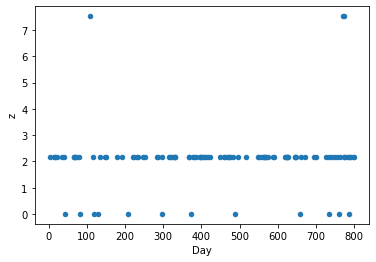

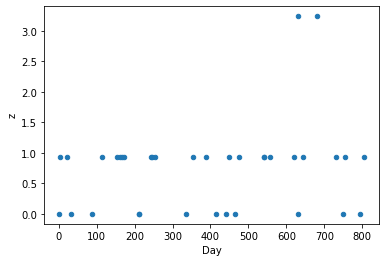

In [69]:
mdf.plot.scatter(x='Day',y='z')
jdf.plot.scatter(x='Day',y='z')

Zeta is risky; would need to identify when it has high level.

<AxesSubplot:xlabel='Day', ylabel='h'>

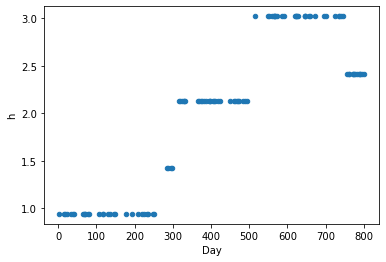

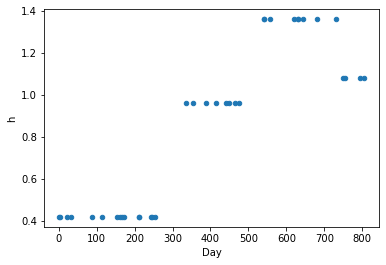

In [70]:
mdf.plot.scatter(x='Day',y='h')
jdf.plot.scatter(x='Day',y='h')

Eta looks time-based. It also appears that each pilot has a modifier that multiplies a certain 'base strength' of Eta resonance. This is probably true for other resonances true.

In [71]:
odf = df[(df.Pilot == 'Amir B.') | (df.Pilot == 'Will C.') | (df.Pilot == 'Flint S.') | (df.Pilot == 'Corazon V.')]

In [72]:
print(odf.to_string())

          Enemy  Strength  Day       Pilot     a     b     g     d     e     z     h
13         Hugh      0.71   35  Corazon V.  2.17  0.29  0.66  0.87  0.03  1.98  0.11
15         Azad      0.90   41     Will C.   NaN  1.40   NaN   NaN   NaN   NaN   NaN
35      Matthew      0.57  110     Will C.  0.85  1.60  0.09  1.02  0.21  0.00  0.90
37         Luke      0.85  112     Amir B.  1.95  1.95  1.46  1.77  0.07  0.88  0.22
64       Brutus      1.00  184     Will C.   NaN  1.50   NaN   NaN   NaN   NaN   NaN
88     Mandible      0.99  242  Corazon V.  2.30  0.30  1.15  0.84  0.04  1.98  0.11
96      Echelon      1.10  263    Flint S.  1.60   NaN   NaN   NaN   NaN   NaN   NaN
101     Isotope      1.00  279    Flint S.  1.60   NaN   NaN   NaN   NaN   NaN   NaN
102    Scrabble      0.99  280  Corazon V.  2.20  0.32  0.76  0.78  0.04  0.00  0.17
110   Metronome      1.10  312     Amir B.  1.80   NaN   NaN   NaN   NaN   NaN   NaN
115   Endeavour      0.21  324    Flint S.  1.55  0.90  0.29  1.4

Nothing useful here. I need to do something else.

I'll bring in enemy strength as a variable; maybe instead of time dependency (which doesn't appear to really be a thing), I have nothing clear since it's all strength dependency.

<AxesSubplot:xlabel='Strength', ylabel='a'>

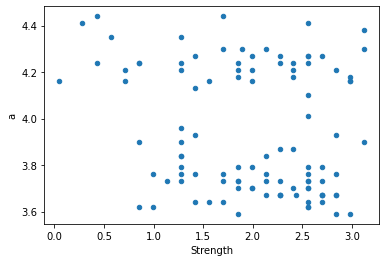

In [73]:
mdf.plot.scatter(x='Strength',y='a')

<AxesSubplot:xlabel='Strength', ylabel='b'>

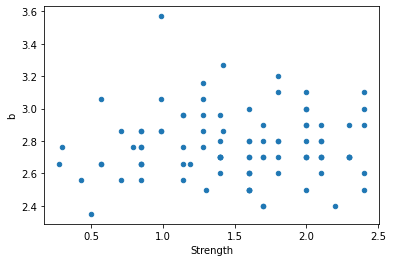

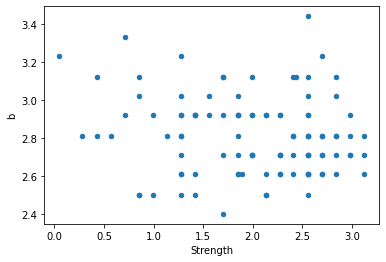

In [80]:
jdf.plot.scatter(x='Strength',y='b')
mdf.plot.scatter(x='Strength',y='b')

<AxesSubplot:xlabel='Strength', ylabel='g'>

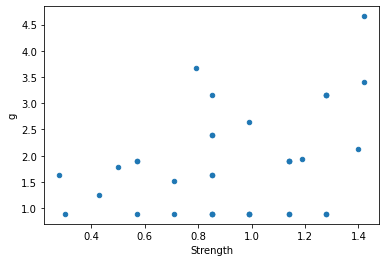

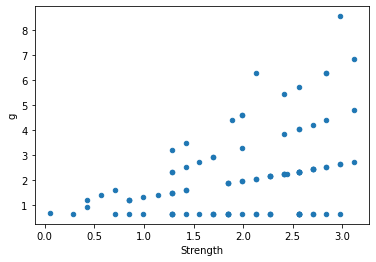

In [81]:
jdf.plot.scatter(x='Strength',y='g')
mdf.plot.scatter(x='Strength',y='g')

<AxesSubplot:xlabel='Strength', ylabel='d'>

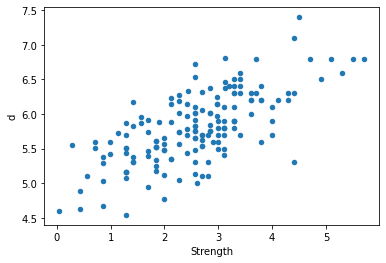

In [76]:
mdf.plot.scatter(x='Strength',y='d')

<AxesSubplot:xlabel='Strength', ylabel='e'>

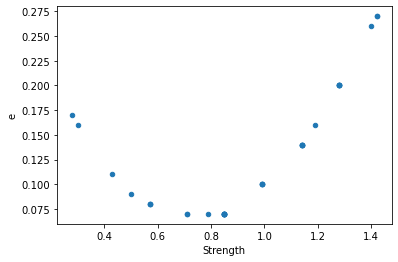

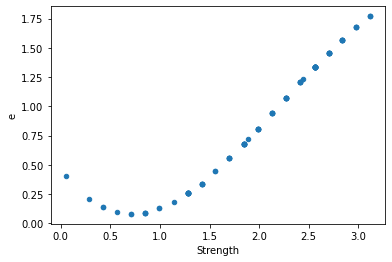

In [82]:
jdf.plot.scatter(x='Strength',y='e')
mdf.plot.scatter(x='Strength',y='e')

<AxesSubplot:xlabel='Strength', ylabel='z'>

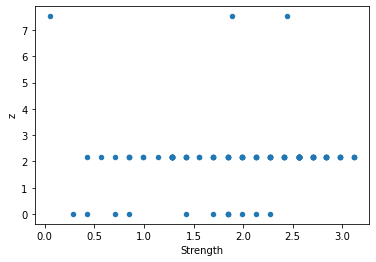

In [78]:
mdf.plot.scatter(x='Strength',y='z')

<AxesSubplot:xlabel='Strength', ylabel='h'>

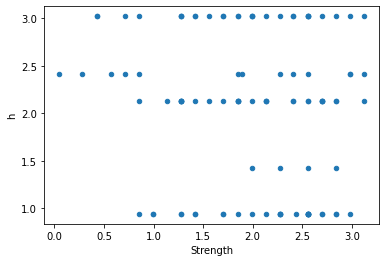

In [79]:
mdf.plot.scatter(x='Strength',y='h')

Wow. Evaluating the above, and assuming every pilot has a multiplier on using each type of resonance;  
Alpha looks good iff someone other than Maria has a higher multiplier than her. Not Janelle, and one of the other 4 would be hard to tell from the limited data points (due to noise).  
Beta looks independent of enemy strength; this is bad, since Earwax has strength 3.6.  
Gamma has various lines, with ~1/3 chance of being on bottom line, second line, upper lines. If I end up on the bottom line, we lose. If not, then Janelle would work.  
Epsilon is unbelievably predictable. I investigate more below.  
Zeta works wonderfully against a few monsters. It would be lovely if this worked against Earwax, but probably not safe enough.  
Eta is time-dependent.

Epsilon-strength analysis:

Janelle is worse than Maria.

Flint gets 0.33 against Endeavor, of strength 0.21. I would expect Maria to get a strength of about 0.28 here, so Flint's multiplier is <2; not enough to defeat Earwax (especially given the slightly unknown curve at these high power levels).

Corazon gets ~0.04 against monsters of strength ~1; is worse than Maria. Amir is similarly bad.

Will gets 0.21 against Matthew; strength 0.57. I expect Maria to have strength~0.1 there, so Will has a multiplier of 2-ish, which should be enough to win.

Will with Epsilon will work (due to predictability of Epsilon resonance), and so I'm done (not going to try to get to 7.2 power; too risky).

